<a href="https://colab.research.google.com/github/Sathwika-Kammampati/ds_sathwika/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

sentiment_df = pd.read_csv('fear_greed_index.csv')
trades_df = pd.read_csv('historical_data.csv')

print("Sentiment dataset:")
print(sentiment_df.head())

print("\nTrader dataset:")
print(trades_df.head())


Sentiment dataset:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df['date_only'] = sentiment_df['date'].dt.date

In [ ]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trades_df['date_only'] = trades_df['Timestamp IST'].dt.date

In [ ]:
merged_df = pd.merge(trades_df,sentiment_df[['date_only', 'classification']],on='date_only',how='inner')

In [ ]:
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()

Merged DataFrame shape: (211218, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [ ]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment:\n", avg_pnl)


Average Closed PnL by Sentiment:
 classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [ ]:
avg_size = merged_df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)
print("Average Trade Size (USD) by Sentiment:\n", avg_size)


Average Trade Size (USD) by Sentiment:
 classification
Fear             7816.109931
Greed            5736.884375
Extreme Fear     5349.731843
Neutral          4782.732661
Extreme Greed    3112.251565
Name: Size USD, dtype: float64


In [ ]:
direction_dist = merged_df.groupby(['classification', 'Direction']).size().unstack().fillna(0)
print("Trade Direction Counts:\n", direction_dist)


Trade Direction Counts:
 Direction       Auto-Deleveraging     Buy  Close Long  Close Short  \
classification                                                       
Extreme Fear                  0.0   807.0      6241.0       3117.0   
Extreme Greed                 0.0  5132.0      7186.0       6497.0   
Fear                          0.0  3207.0     17260.0       9221.0   
Greed                         8.0  4685.0      7998.0      11322.0   
Neutral                       0.0  2885.0      9993.0       5850.0   

Direction       Liquidated Isolated Short  Long > Short  Open Long  \
classification                                                       
Extreme Fear                          0.0           5.0     7005.0   
Extreme Greed                         0.0           7.0     6300.0   
Fear                                  0.0          14.0    17824.0   
Greed                                 1.0          16.0     8544.0   
Neutral                               0.0          15.0    10222

In [ ]:
trade_counts = merged_df['classification'].value_counts()
print("Total Trades per Sentiment:\n", trade_counts)


Total Trades per Sentiment:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


/tmp/ipython-input-10-2085203943.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')
/tmp/ipython-input-10-2085203943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')


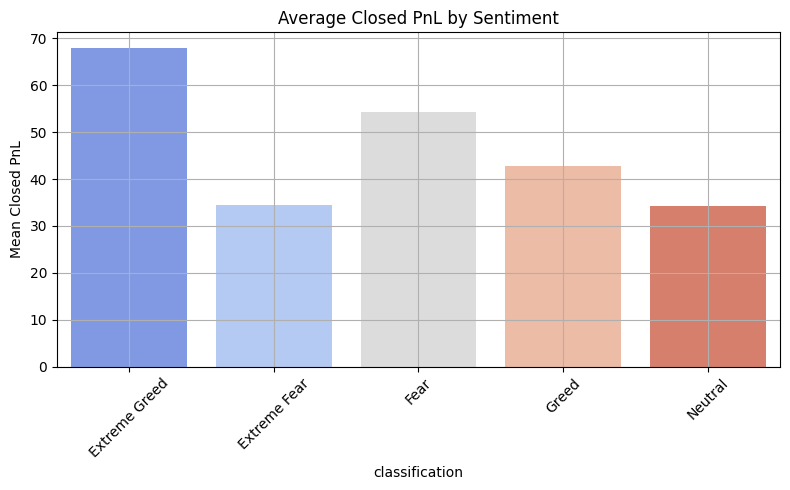

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Mean Closed PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1435370205.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Size USD', estimator='mean', ci=None, palette='viridis')
/tmp/ipython-input-11-1435370205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Size USD', estimator='mean', ci=None, palette='viridis')


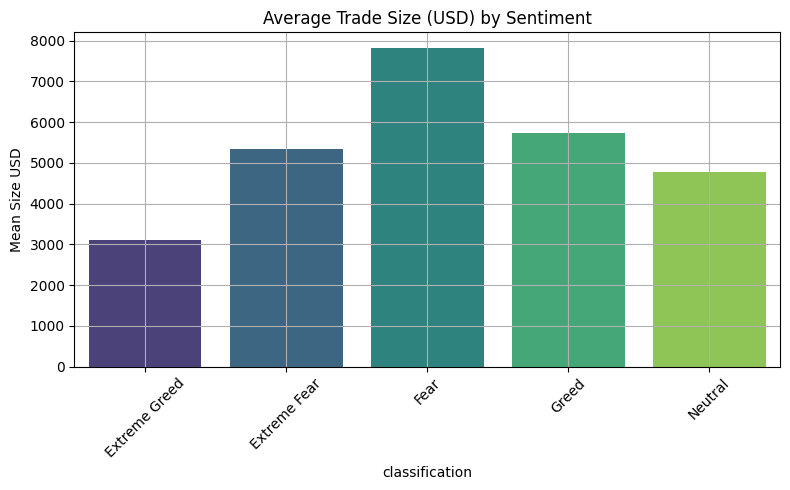

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Size USD', estimator='mean', ci=None, palette='viridis')
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Mean Size USD")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


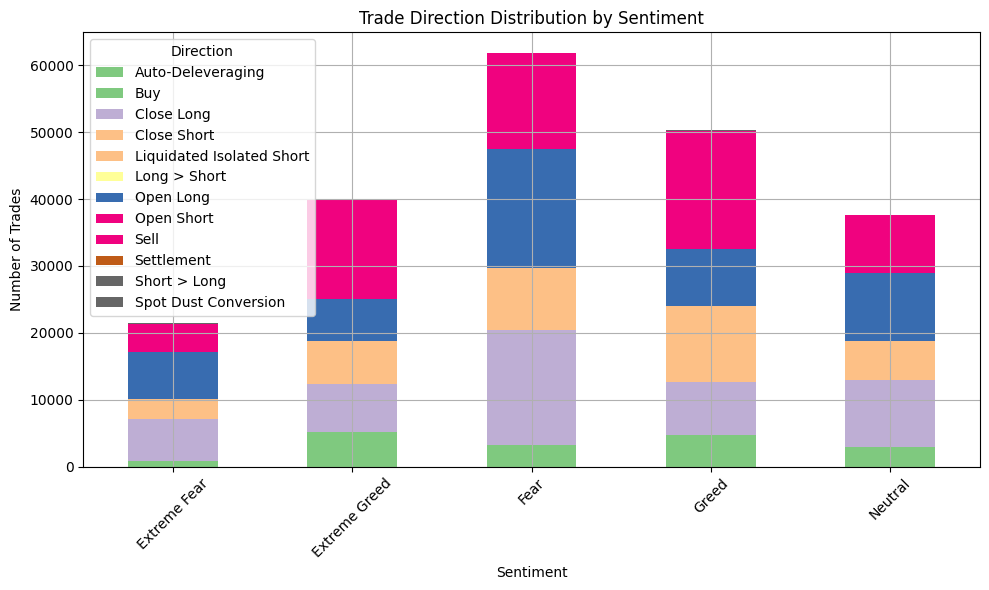

In [ ]:
dir_counts = merged_df.groupby(['classification', 'Direction']).size().unstack().fillna(0)

dir_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title("Trade Direction Distribution by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-946512506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='Set2')


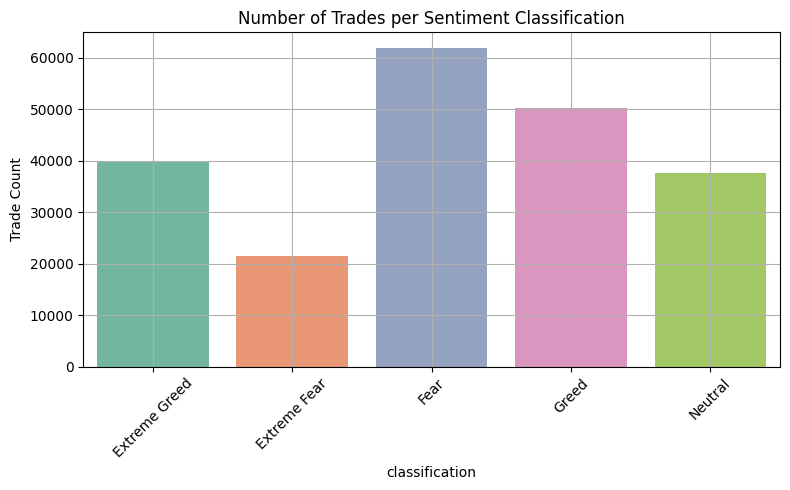

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification', palette='Set2')
plt.title("Number of Trades per Sentiment Classification")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()